# **Aprendizaje Estadístico 2024** <font size=4 color='gray'>Alan Reyes-Figueroa</font>
#### <font color='gray'>Análisis de componentes principales (PCA)</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

## 1. Leer datos

In [2]:
data = pd.read_csv('deport.csv', sep=',', header=0)
data.shape

(55, 9)

In [3]:
data.head()

,100m,200m,400m,800m,1500m,5km,10km,marath,country
0,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72,argentin
1,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30,australi
2,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90,austria
3,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95,belgium
4,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62,bermuda


## 2. Exploración de datos

In [4]:
# contar si hay datos faltantes

data.isna().sum()

100m       0
200m       0
400m       0
800m       0
1500m      0
5km        0
10km       0
marath     0
country    0
dtype: int64

In [5]:
# tipo de datos

data.dtypes

100m       float64
200m       float64
400m       float64
800m       float64
1500m      float64
5km        float64
10km       float64
marath     float64
country     object
dtype: object

In [6]:
# obtener estadísticas simples

data.describe()

,100m,200m,400m,800m,1500m,5km,10km,marath
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,10.471091,20.940364,46.438727,1.793273,3.698182,13.845818,28.989091,136.624000
std,0.351429,0.644647,1.457018,0.063685,0.155909,0.801160,1.807732,9.227033
min,9.930000,19.720000,43.860000,1.700000,3.510000,13.010000,27.380000,128.220000
25%,10.270000,20.595000,45.560000,1.755000,3.600000,13.275000,27.695000,130.705000
50%,10.410000,20.810000,46.100000,1.790000,3.640000,13.500000,28.190000,132.350000
75%,10.590000,21.285000,47.300000,1.815000,3.770000,14.145000,29.870000,139.300000
max,12.180000,23.200000,52.940000,2.020000,4.240000,16.700000,35.380000,164.700000


<Axes: >

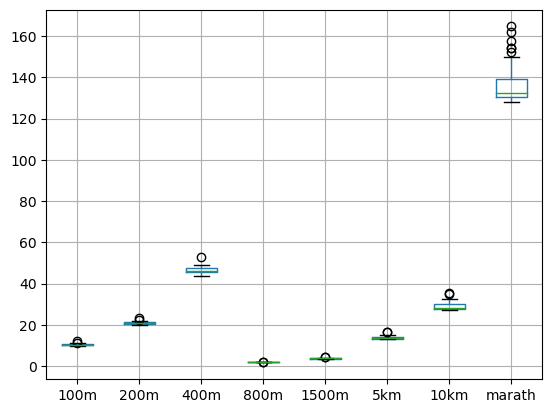

In [7]:
data.boxplot()

<Figure size 640x480 with 0 Axes>

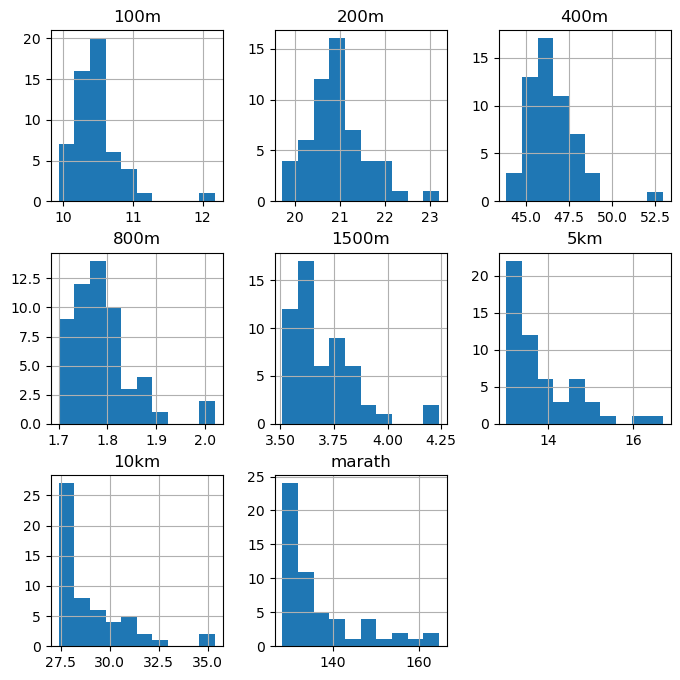

In [8]:
# histogramas

plt.figure()
data.hist(figsize=(8,8))
plt.show()

<Figure size 800x800 with 0 Axes>

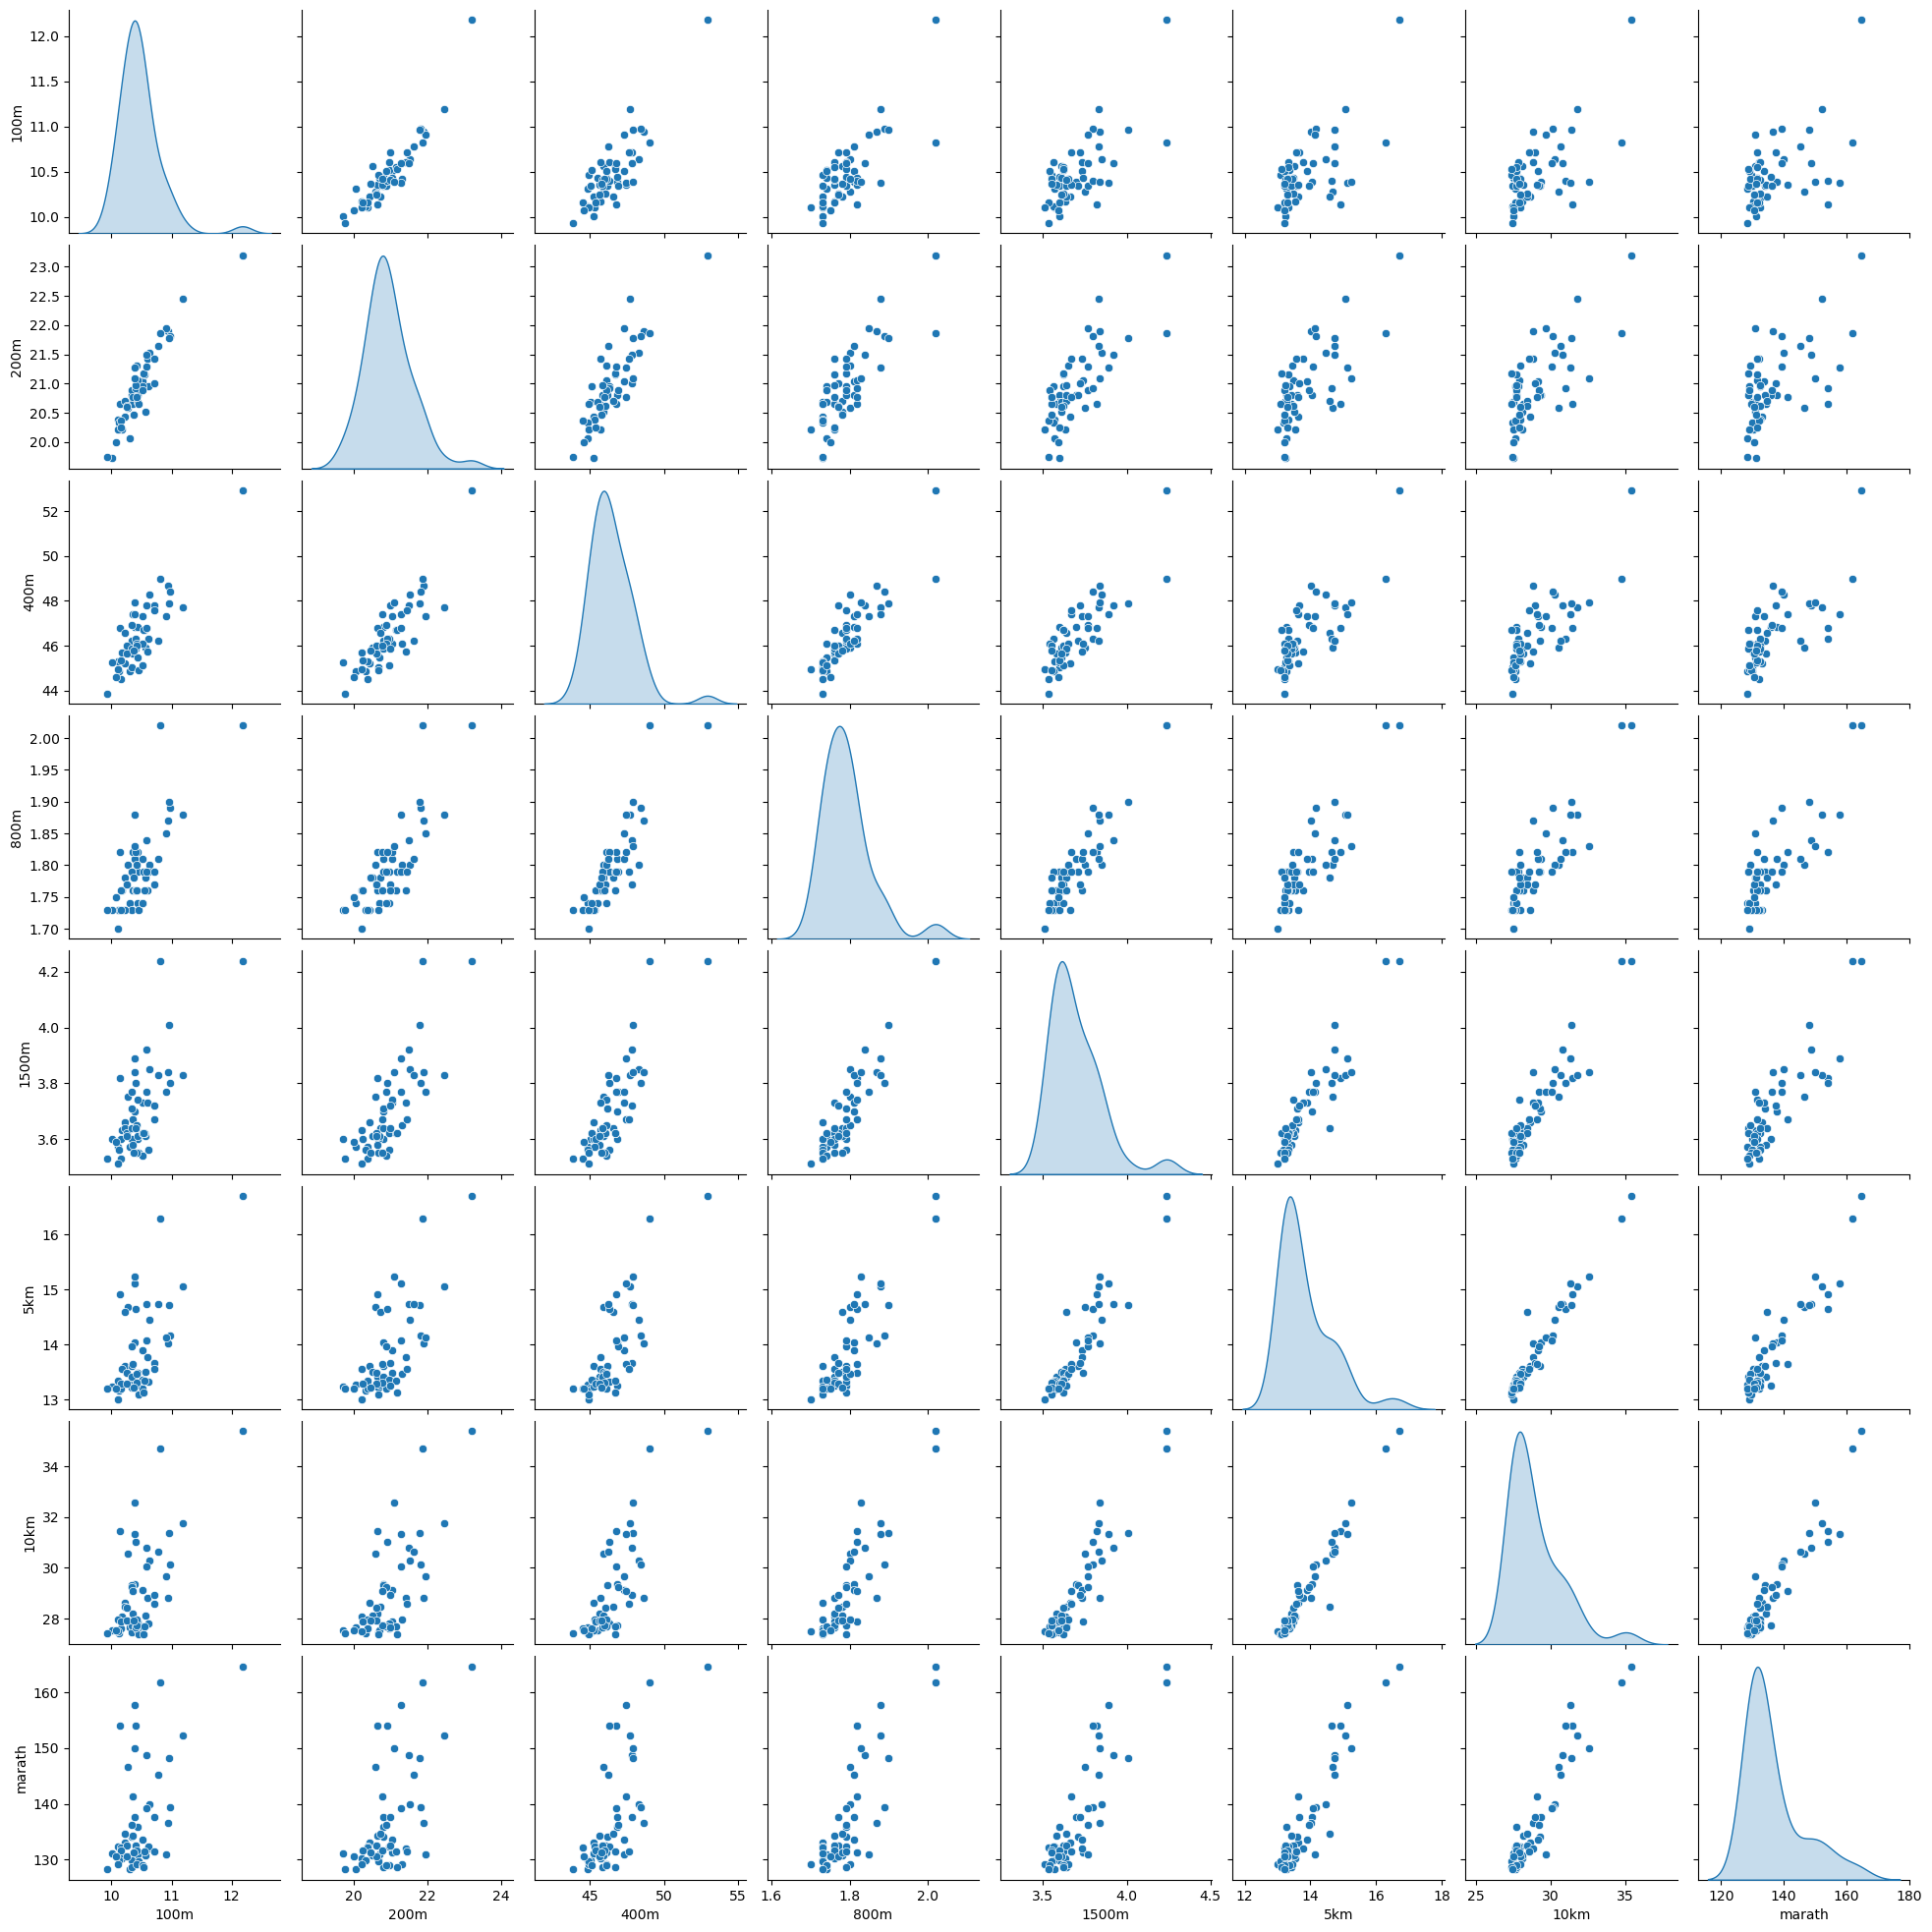

In [9]:
# pairplots

plt.figure(figsize=(8,8))
sns.pairplot(data, diag_kind='kde')
plt.show()

## 3. Descomposición SVD

In [10]:
# convertir los datos a un np.array

names = data.values[:,-1]

X = data.values[:,:-1].astype(np.float32)
X.shape

(55, 8)

In [11]:
type(X)

numpy.ndarray

In [12]:
# centramos los datos

mu = X.mean(axis=0)

std = X.std(axis=0)

Xc = (X - mu) / std

In [13]:
mu

array([ 10.471092 ,  20.940363 ,  46.438732 ,   1.7932729,   3.6981816,
        13.8458185,  28.989094 , 136.624    ], dtype=float32)

In [14]:
Xc.mean(axis=0)

array([-3.6434694e-06,  1.0295348e-06, -3.5004182e-06, -2.0894138e-06,
        1.0447069e-06, -3.8580461e-07, -1.5388836e-06,  8.1929295e-07],
      dtype=float32)

In [15]:
# Otra forma de centrar los datos usando matrices de proyección

#n = X.shape[0]
#one = np.ones(n).reshape(-1,1)

#J = np.eye(n) - one@(one.T)/n       # matriz de proyección
#Xc = J@X                            # centramos los datos
#Xc = Xc / std                       # estandarización

In [16]:
# matriz de covarianzas
Cov = (Xc.T) @ Xc                 # @ = producto matricial

In [17]:
print(np.round(Cov, 2))

[[55.   50.75 46.26 41.58 38.51 34.07 34.79 28.6 ]
 [50.75 55.   46.79 44.36 42.62 38.25 38.31 32.79]
 [46.26 46.79 55.   47.86 45.94 42.82 43.3  38.77]
 [41.58 44.36 47.86 55.   50.49 47.5  47.8  44.36]
 [38.51 42.62 45.94 50.49 55.   51.05 51.41 47.61]
 [34.07 38.25 42.82 47.5  51.05 55.   53.6  51.27]
 [34.79 38.31 43.3  47.8  51.41 53.6  55.   51.87]
 [28.6  32.79 38.77 44.36 47.61 51.27 51.87 55.  ]]


In [18]:
# Ahora vamos a usar la descomposición SVD de Xc

U, S, V = np.linalg.svd(Xc)

In [19]:
print(np.round(U, 2))

[[ 0.01 -0.05 -0.11 ... -0.2  -0.14  0.13]
 [-0.13 -0.03  0.01 ... -0.2  -0.18  0.14]
 [-0.04  0.07 -0.14 ...  0.14  0.04  0.01]
 ...
 [-0.18 -0.16 -0.01 ...  0.89 -0.07 -0.06]
 [-0.14 -0.11 -0.07 ... -0.08  0.92 -0.06]
 [ 0.38 -0.28 -0.24 ... -0.03 -0.04  0.57]]


In [20]:
U.shape

(55, 55)

In [21]:
print(S)

[19.084497   6.9475894  2.9601798  2.6120327  2.0960474  1.9334127
  1.5978343  1.1149018]


In [22]:
print(np.round(V.T, 2))

[[ 0.32  0.57  0.33 -0.13  0.26  0.59  0.14  0.11]
 [ 0.34  0.46  0.36  0.26 -0.15 -0.66 -0.11 -0.1 ]
 [ 0.36  0.25 -0.56 -0.65 -0.22 -0.16 -0.   -0.  ]
 [ 0.37  0.01 -0.53  0.48  0.54  0.01 -0.24 -0.04]
 [ 0.37 -0.14 -0.15  0.4  -0.49  0.16  0.61  0.14]
 [ 0.36 -0.31  0.19 -0.03 -0.25  0.14 -0.59  0.55]
 [ 0.37 -0.31  0.18 -0.08 -0.13  0.22 -0.18 -0.8 ]
 [ 0.34 -0.44  0.26 -0.3   0.5  -0.32  0.4   0.16]]


In [23]:
V.shape

(8, 8)

### 1D

In [24]:
# proyección a 1D

X1 = Xc @ (V[:1,:].T)   #@np.diag(S[:1])
X1.shape

(55, 1)

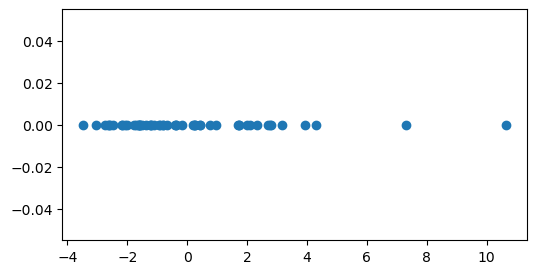

In [25]:
plt.figure(figsize=(6,3))
#plt.plot(X1, np.zeros(X1.shape), 'bo')
plt.scatter(X1, np.zeros(X1.shape))
plt.show()

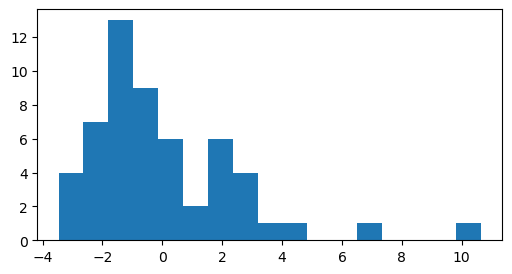

In [26]:
plt.figure(figsize=(6,3))
plt.hist(X1, bins=17)
plt.show()

### 2D

In [27]:
# proyección a 2D

X2 = Xc @ (V[:2,:].T)     #@np.diag(S[:2])
X2.shape

(55, 2)

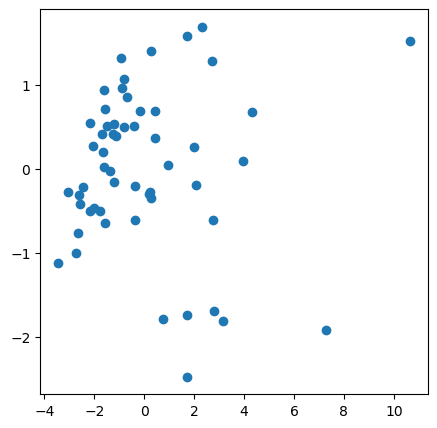

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(X2[:,0], X2[:,1])
plt.show()

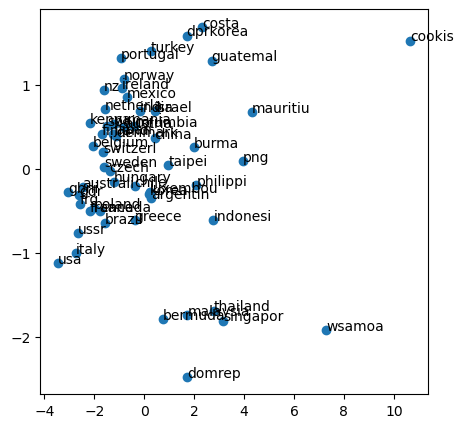

In [29]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X2[:,0], X2[:,1])
for i in range(0, X2.shape[0]):
    plt.annotate(names[i], (X2[i,0], X2[i,1]))
plt.show()

### 3D

In [30]:
# proyección a 3D

X3 = Xc@(V[:3,:].T) #@np.diag(S[:3])
X3.shape

(55, 3)

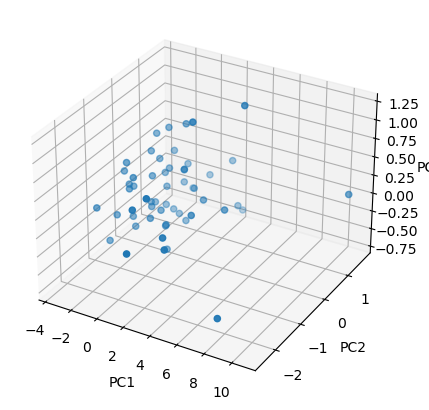

In [31]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Varianza explicada por cada componente

In [32]:
# Calculamos los autovalores de Cov(X) = X^TX (cuadrados de los valores singulares)
lambdas = S**2
print(lambdas)

[364.21805    48.268997    8.762665    6.822715    4.3934145   3.7380846
   2.5530746   1.243006 ]


In [33]:
# Normalizamos los lambdas para que sumen 1
lambdas = lambdas / lambdas.sum()
print(lambdas)

[0.8277682  0.10970226 0.01991515 0.01550617 0.00998503 0.00849565
 0.00580244 0.00282501]


In [34]:
lambdas.cumsum()

array([0.8277682 , 0.93747044, 0.9573856 , 0.97289175, 0.9828768 ,
       0.9913724 , 0.99717486, 0.9999999 ], dtype=float32)

Así la primera componente explica el 82.77% de la varianza de los datos, la segunda componente explica el 10.90% de la varianza de los datos.

En suma, las primeras dos componentes explican el 93.74% de la variabilidad de los datos.

## 4. PCA usando scikit-learn

In [35]:
from sklearn.decomposition import PCA

In [36]:
pcamodel = PCA(n_components=8)
pca2 = pcamodel.fit_transform(Xc)
pca2.shape

(55, 8)

In [37]:
pcamodel.explained_variance_

array([6.7447796 , 0.89386964, 0.1622717 , 0.12634654, 0.08135953,
       0.06922377, 0.04727915, 0.02301861], dtype=float32)

In [38]:
pcamodel.explained_variance_ratio_

array([0.8277684 , 0.10970218, 0.01991516, 0.01550617, 0.00998503,
       0.00849564, 0.00580244, 0.00282501], dtype=float32)

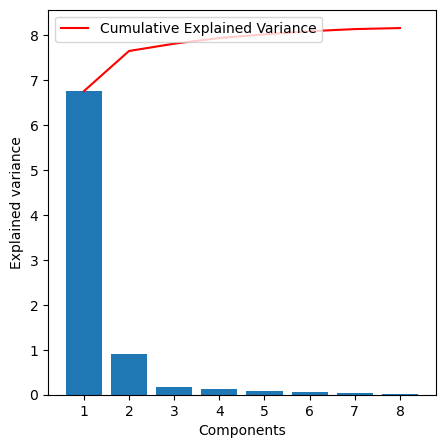

In [39]:
# Figura con el % de varianza explicada por cada componente
plt.figure(figsize=(5,5))
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

In [40]:
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

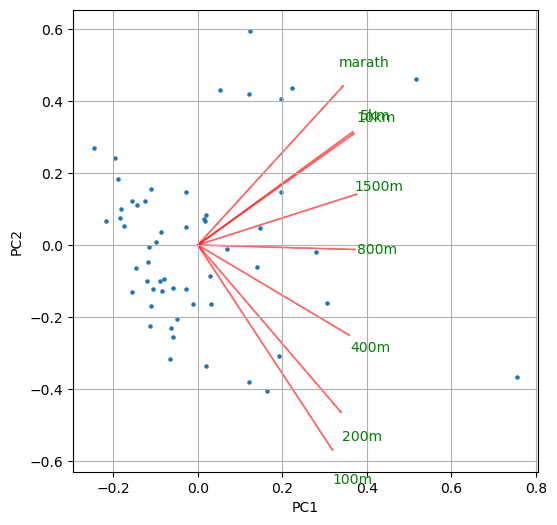

In [41]:
# Figura con my_biplot
plt.figure(figsize=(6,6))
mybiplot(pca2[:,0:2], np.transpose(pcamodel.components_[0:2, :]), list(data.columns[:-1]))
plt.show()

In [42]:
# Esta matriz da los componentes principales

components = pcamodel.components_.T
print(np.round(components, 2))

[[ 0.32 -0.57  0.33 -0.13 -0.26  0.59 -0.14  0.11]
 [ 0.34 -0.46  0.36  0.26  0.15 -0.66  0.11 -0.1 ]
 [ 0.36 -0.25 -0.56 -0.65  0.22 -0.16  0.   -0.  ]
 [ 0.37 -0.01 -0.53  0.48 -0.54  0.01  0.24 -0.04]
 [ 0.37  0.14 -0.15  0.4   0.49  0.16 -0.61  0.14]
 [ 0.36  0.31  0.19 -0.03  0.25  0.14  0.59  0.55]
 [ 0.37  0.31  0.18 -0.08  0.13  0.22  0.18 -0.8 ]
 [ 0.34  0.44  0.26 -0.3  -0.5  -0.32 -0.4   0.16]]
